# Intro to pyplot

## Intro

In [1]:
import matplotlib.pyplot as plt

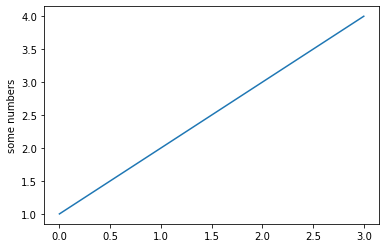

In [2]:
plt.plot([1,2,3,4])
plt.ylabel('some numbers')
plt.show()

You may be wondering why the x-axis ranges from 0-3 and the y-axis from 1-4. If you provide a single list or array to plot, matplotlib assumes it is a sequence of y values, and automatically generates the x values for you. Since python ranges start with 0, the default x vector has the same length as y but starts with 0. Hence the x data are [0, 1, 2, 3].

plot is a versatile function, and will take an arbitrary number of arguments. For example, to plot x versus y, you can write:

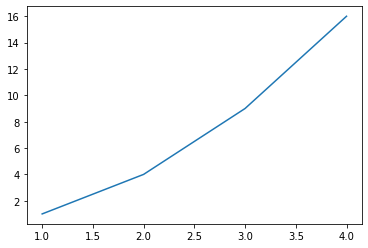

In [3]:
plt.plot([1,2,3,4],[1,4,9,16])

## Formatting the style of your plot

For every x, y pair of arguments, there is an optional third argument which is the format string that indicates the color and line type of the plot. The letters and symbols of the format string are from MATLAB, and you concatenate a color string with a line style string. The default format string is 'b-', which is a solid blue line. For example, to plot the above with red circles, you would issue

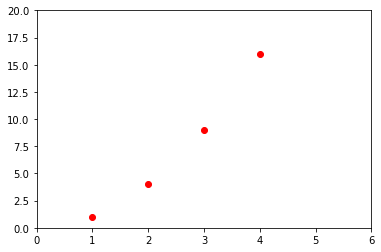

In [4]:
plt.plot([1,2,3,4],[1,4,9,16],'ro')
plt.axis([0,6,0,20])
plt.show()

See the plot documentation for a complete list of line styles and format strings. <br>
The axis function(<b>'plt.axis'</b>) in the example above takes a list of [xmin, xmax, ymin, ymax] and specifies the viewport of the axes.

If matplotlib were limited to working with lists, it would be fairly useless for numeric processing. Generally, you will use numpy arrays. In fact, all sequences are converted to numpy arrays internally. The example below illustrates plotting several lines with different format styles in one function call using arrays.

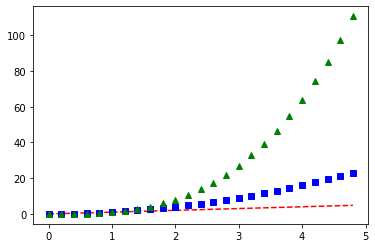

In [6]:
import numpy as np

t = np.arange(0,5,0.2)

# red dashes, blue squares, green triangles > 하나에 다 그릴 수 있음.
plt.plot(t,t,'r--',t,t**2,'bs',t,t**3,'g^')
plt.show()

# Plotting with keyword strings

There are some instances where you have data in a format that lets you access particular variables with strings. For example, with numpy.recarray or pandas.DataFrame.

Matplotlib allows you provide such an object with the data keyword argument. If provided, then you may generate plots with the strings corresponding to these variables.

In [8]:
data = {'a' : np.arange(50), 'c' : np.random.randint(0,50,50), 'd' : np.random.randn(50)}
data['b'] = data['a'] + 10*np.random.randn(50)
data['d'] = np.abs(data['d']) * 100

In [10]:
data

{'a': array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
 'c': array([ 4, 27, 44, 31, 28, 24, 20, 21, 34,  7, 24, 43, 31, 45, 40,  1, 39,
        26, 19, 12,  2, 20, 36, 13, 18, 31,  9, 12, 21, 39, 24, 38, 30, 12,
         5, 32, 26, 35, 10, 12, 38, 30, 10, 46, 11,  1, 23,  4, 34, 21]),
 'd': array([  1.16862011,  40.06147185,  69.99343686,  82.55159309,
          2.7155762 ,  30.15239876,  30.18198483,  48.08372216,
         85.92141427, 133.40833148,  76.13902166, 107.29689057,
        249.15389313,  29.96629581,  56.51157922,  87.66853744,
         59.47149736,  95.25372805,  12.33071527, 158.31240319,
          2.44129016,  79.43321639, 124.30295164,  94.87623146,
         73.71733884,  48.00730998,  59.60858023,  86.15847385,
         38.63347933,  25.20634709, 130.05522293,  12.15229059,
         48.7018496 ,

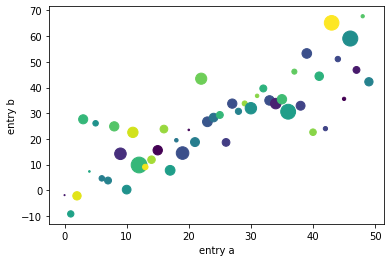

In [11]:
plt.scatter('a','b',c = 'c', s = 'd', data = data) # c : color / s; size..
plt.xlabel('entry a')
plt.ylabel('entry b')
plt.show()

# Plotting with categorical variables

It is also possible to create a plot using categorical variables. Matplotlib allows you to pass categorical variables directly to many plotting functions. For example:

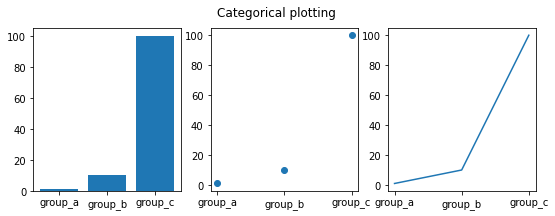

In [15]:
names = ['group_a','group_b','group_c']
values = [1,10,100]

plt.figure(figsize= (9,3))

plt.subplot(131)
plt.bar(names,values)

plt.subplot(132)
plt.scatter(names,values)

plt.subplot(133)
plt.plot(names,values)

plt.suptitle("Categorical plotting")
plt.show()

# Controlling line properties

Lines have many attributes that you can set: linewidth, dash style, antialiased, etc; see matplotlib.lines.Line2D. There are several ways to set line properties

In [17]:
x = [1,2,3,4]
y = [1,4,9,16]

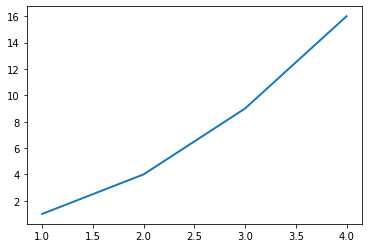

In [18]:
# Use keyword arguments
plt.plot(x,y,linewidth = 2.0)

Use the setter methods of a Line2D instance. plot returns a list of Line2D objects; e.g., line1, line2 = plot(x1, y1, x2, y2). In the code below we will suppose that we have only one line so that the list returned is of length 1. We use tuple unpacking with line, to get the first element of that list:

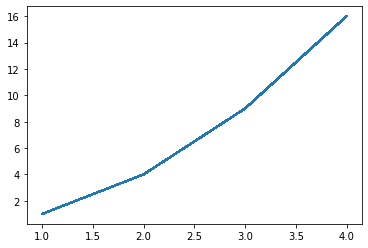

In [25]:
line, = plt.plot(x,y,'-')
line.set_antialiased(False) # turon off antialiasing

Use setp. The example below uses a MATLAB-style function to set multiple properties on a list of lines. setp works transparently with a list of objects or a single object. You can either use python keyword arguments or MATLAB-style string/value pairs:

In [26]:
x1 = [1,2,3,4]
y1 = [1,4,9,16]

x2 = [2,4,6,8]
y2 = [4,16,36,64]

[None, None, None, None]

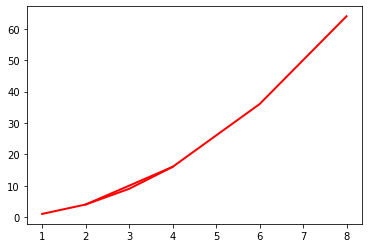

In [27]:
lines = plt.plot(x1,y1,x2,y2)

plt.setp(lines, color = 'r', linewidth = 2.0)

plt.setp(lines,'color','r','linewidth',2.0)

To get a list of settable line properties, call the setp function with a line or lines as argument

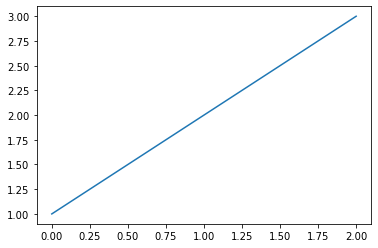

In [28]:
lines = plt.plot([1,2,3])

In [29]:
plt.setp(lines)

  agg_filter: a filter function, which takes a (m, n, 3) float array and a dpi value, and returns a (m, n, 3) array
  alpha: scalar or None
  animated: bool
  antialiased or aa: bool
  clip_box: `.Bbox`
  clip_on: bool
  clip_path: Patch or (Path, Transform) or None
  color or c: color
  contains: unknown
  dash_capstyle: `.CapStyle` or {'butt', 'projecting', 'round'}
  dash_joinstyle: `.JoinStyle` or {'miter', 'round', 'bevel'}
  dashes: sequence of floats (on/off ink in points) or (None, None)
  data: (2, N) array or two 1D arrays
  drawstyle or ds: {'default', 'steps', 'steps-pre', 'steps-mid', 'steps-post'}, default: 'default'
  figure: `.Figure`
  fillstyle: {'full', 'left', 'right', 'bottom', 'top', 'none'}
  gid: str
  in_layout: bool
  label: object
  linestyle or ls: {'-', '--', '-.', ':', '', (offset, on-off-seq), ...}
  linewidth or lw: float
  marker: marker style string, `~.path.Path` or `~.markers.MarkerStyle`
  markeredgecolor or mec: color
  markeredgewidth or mew: floa

# Working with multiple figures and axes

MATLAB, and pyplot, have the concept of the current figure and the current axes. All plotting functions apply to the current axes. The function gca returns the current axes (a matplotlib.axes.Axes instance), and gcf returns the current figure (a matplotlib.figure.Figure instance). Normally, you don't have to worry about this, because it is all taken care of behind the scenes. Below is a script to create two subplots.

In [32]:
def f(t):
    return np.exp(-t) * np.cos(2*np.pi *t)

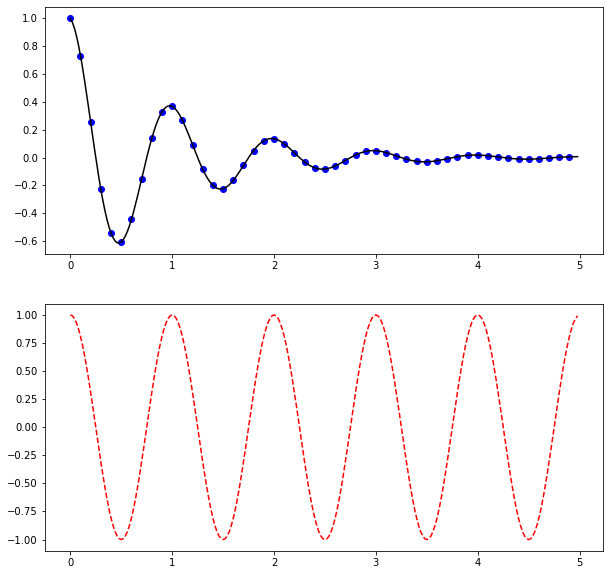

In [47]:
t1 = np.arange(0.0,5.0,0.1)
t2 = np.arange(0.0,5.0,0.02)

plt.figure(figsize = (10,10))
plt.subplot(211)
plt.plot(t1,f(t1),'bo', t2, f(t2),'black')

plt.subplot(212)
plt.plot(t2,np.cos(2*np.pi*t2),'r--')
plt.show()

Text(0.5, 1.0, 'Easy as 1, 2, 3')

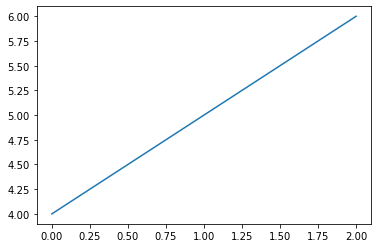

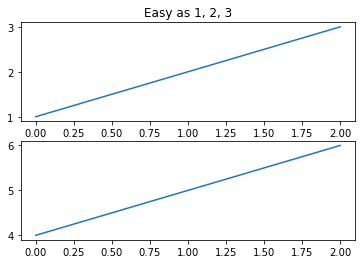

In [48]:
import matplotlib.pyplot as plt
plt.figure(1)                # the first figure
plt.subplot(211)             # the first subplot in the first figure
plt.plot([1, 2, 3])
plt.subplot(212)             # the second subplot in the first figure
plt.plot([4, 5, 6])


plt.figure(2)                # a second figure
plt.plot([4, 5, 6])          # creates a subplot() by default

plt.figure(1)                # figure 1 current; subplot(212) still current
plt.subplot(211)             # make subplot(211) in figure1 current
plt.title('Easy as 1, 2, 3') # subplot 211 title